In [2]:
from pandas import read_table
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import BayesianRidge

In [3]:
filename = 'features.txt'
y_label='activity'
dataframe = read_table(filename, delim_whitespace=True,names=['id', 'feature_name'])
activity_map = {str(row.id):row.label_name for i, row in read_table('activity_labels.txt',delim_whitespace=True, names=['id', 'label_name']).iterrows()}
train_data_x = read_table('train/X_train.txt', delim_whitespace=True, names=dataframe.feature_name.tolist())
train_data_y = read_table('train/y_train.txt', delim_whitespace=True, names=[y_label])
train_data_y[y_label] = train_data_y[y_label].apply(lambda x: activity_map[str(x)])
train_data = pd.concat([train_data_y, train_data_x], axis=1)
test_data_x = read_table('test/X_test.txt', delim_whitespace=True, names=dataframe.feature_name.tolist())
test_data_y = read_table('test/y_test.txt', delim_whitespace=True, names=[y_label])
test_data_y[y_label] = test_data_y[y_label].apply(lambda x: activity_map[str(x)])
test_data= pd.concat([test_data_y,test_data_x], axis=1)
array = train_data.values
X = array[:,1:10]
Y = array[:,10]

/home/gautam/anaconda3/lib/python3.6/site-packages/pandas/io/parsers.py:709: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


In [5]:
kfold=KFold(n_splits=10,random_state=7)
scoring='neg_mean_squared_error'
model=BayesianRidge()
results=cross_val_score(model,X,Y,cv=kfold,scoring=scoring)

# For Train datasets

In [6]:
print(results)

[-0.00825185 -0.00721217 -0.00631257 -0.00467599 -0.0043228  -0.00712977
 -0.00595353 -0.0065788  -0.00511458 -0.005241  ]


In [7]:
print(results.mean())

-0.006079305623440456


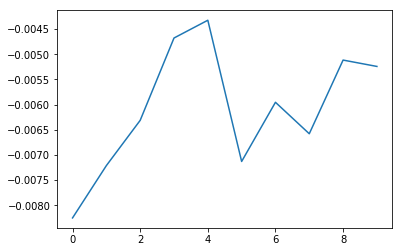

In [8]:
plt.plot(results)

# For Test Datasets

In [9]:
array=test_data.values
X=array[:,1:10]
Y=array[:,10]

In [10]:
kfold=KFold(n_splits=10,random_state=7)
scoring='neg_mean_squared_error'
model=BayesianRidge()
results=cross_val_score(model,X,Y,cv=kfold,scoring=scoring)

In [11]:
print(results)

[-0.00704622 -0.00716779 -0.00735763 -0.00621115 -0.00568834 -0.0039744
 -0.00646193 -0.00477979 -0.00365985 -0.0069752 ]


In [12]:
print(results.mean())

-0.005932228515122511


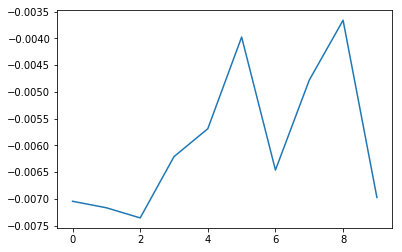

In [13]:
plt.plot(results)